In [1]:
%cd ..

/mnt/ceph/users/zzhang/CRISPR_pred/crispr_kinn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

kinn_sty = {
    "axes.titlesize": 18,
    "axes.labelsize": 20,
    "lines.linewidth": 1,
    "lines.markersize": 10,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "font.size": 18,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(kinn_sty)

In [3]:
def read_train_hist(data, model, post, pardir):
    dfs = []
    for i in range(1,4):
        df = pd.read_table(f"outputs/sim/{pardir}/{data}-rep{i}{model}{post}/train_history.tsv")
        df['rep'] = i
        genavg = df[['gen', 'test_reward']].groupby('gen').mean()
        best_ind = [max(df.query(f'gen<={x}')['test_reward']) for x in genavg.index ]
        plot_df = pd.DataFrame({'GenAvg': genavg['test_reward'], 'Best': best_ind, 'Generation':genavg.index,
                                'rep': i
                               })
        dfs.append(plot_df)

    plot_df = pd.concat(dfs, axis=0)
    return plot_df

def make_plot(plot_df, ax=None, main=""):
    ax = sns.lineplot(x='Generation', y='Best', data=plot_df, ax=ax, color="red", label="BestIndv")
    sns.lineplot(x='Generation', y='GenAvg', data=plot_df, ax=ax, color="black", label="Generation Avg.")

    ax.set_ylabel("Reward (Pearson correlation)", fontsize=12)
    ax.set_xlabel("Generation", fontsize=12)
    ax.set_ylim(0.4, 1)
    ax.legend().remove()
    ax.set_title(main, fontsize=12)
    [ax.axhline(y=y, ls="--", color="grey", alpha=0.7) for y in (0.5,0.6,0.7,0.8,0.9)]
    

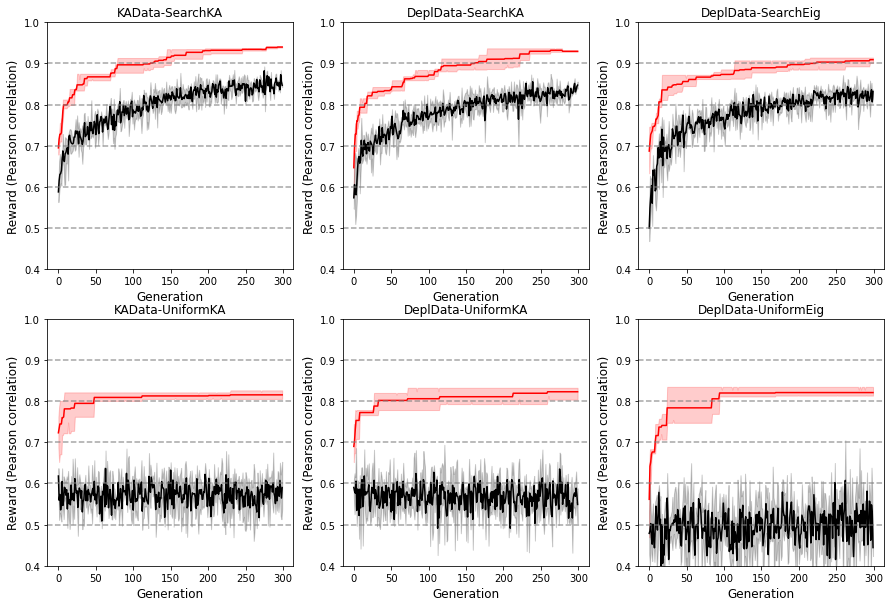

In [4]:
fig, axs_ = plt.subplots(2,3, figsize=(15,10))
axs = [x for row in axs_ for x in row]


make_plot(read_train_hist(
        data="21-11-1_test_1", 
        model="",
        pardir="2022-07-05",
        post=""),
    ax=axs[0],
    main="KAData-SearchKA"
)
make_plot(read_train_hist(
        data="22-06-28_synth_data_depl", 
        model="", 
        pardir="2022-07-05",
        post=""),
    ax=axs[1],
    main="DeplData-SearchKA"
)
make_plot(read_train_hist(
        data="22-06-28_synth_data_depl", 
        model="--use-sink-state",
        pardir="2022-07-05",
        post=""),
    ax=axs[2],
    main="DeplData-SearchEig"
)

make_plot(read_train_hist(
        data="21-11-1_test_1", 
        model="", 
        pardir="2022-07-07",
        post="--disable-posterior"),
    ax=axs[3],
    main="KAData-UniformKA"
)
make_plot(read_train_hist(
        data="22-06-28_synth_data_depl", 
        model="", 
        pardir="2022-07-07",
        post="--disable-posterior"),
    ax=axs[4],
    main="DeplData-UniformKA"
)
make_plot(read_train_hist(
        data="22-06-28_synth_data_depl", 
        model="--use-sink-state", 
        pardir="2022-07-07",
        post="--disable-posterior"),
    ax=axs[5],
    main="DeplData-UniformEig"
)

In [5]:
fig.savefig("outputs/sim_sum.pdf")

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w


Last updated: Tue Dec 13 2022

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.22.0

matplotlib: 3.4.3
pandas    : 1.0.3
seaborn   : 0.11.1
numpy     : 1.19.5

Watermark: 2.3.1

